# Gráficos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
maximo_tiempos = pd.read_csv("results/maximo-tiempos/indice.csv")
maximo_comparacion = pd.read_csv("results/maximo-single-vs-paralelo/indice.csv")

sns.set_style("darkgrid")

## Experimento 1: Tiempo de ejecución en función de la cantidad de threads

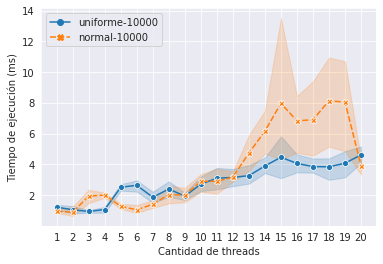

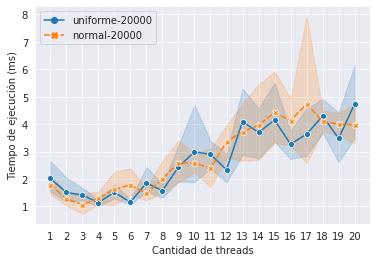

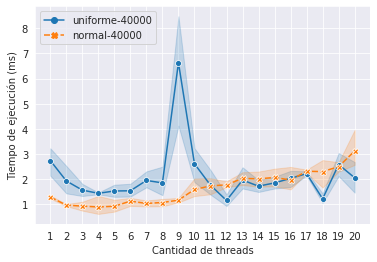

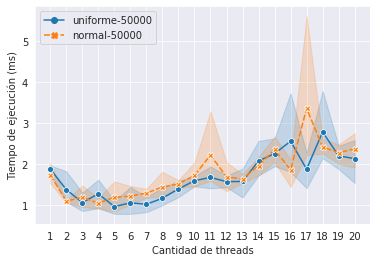

In [3]:
data = maximo_tiempos.copy()

sizes = [10000, 20000, 40000, 50000]
for s in sizes:
    size_k = data.query(F"dataset in ('uniforme-{s}', 'normal-{s}')")

    g = sns.lineplot(data=size_k, x="threads", y="tiempo", hue="dataset", style="dataset", markers=True, err_style="band")
    g.set_xticks(range(1,21))
    plt.legend(loc='upper left')
    plt.xlabel("Cantidad de threads")
    plt.ylabel("Tiempo de ejecución (ms)")
    #plt.ylim((0, 6))
    plt.savefig(F"results/maximo-tiempos/max-experimento1-{s}-a.svg")
    plt.show()

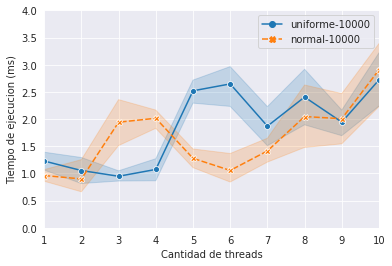

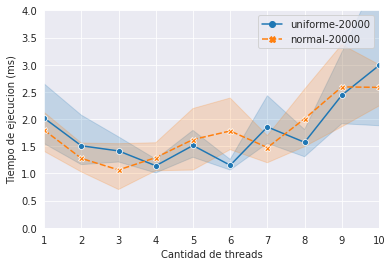

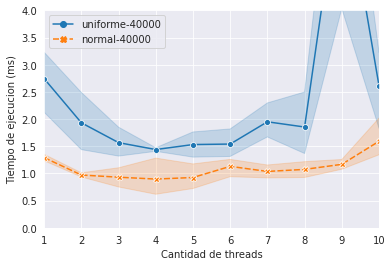

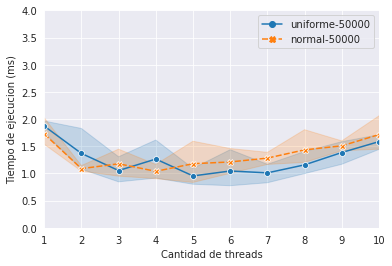

In [4]:
# Zoom sobre cantidad de threads
for s in sizes:
    size_k = data.query(F"dataset in ('uniforme-{s}', 'normal-{s}')")

    g = sns.lineplot(data=size_k, x="threads", y="tiempo", hue="dataset", style="dataset", markers=True, err_style="band")
    g.set_xticks(range(1,11))
    g.set_xlim(1,10)
    g.set_ylim(0,4)
    plt.legend()
    plt.xlabel("Cantidad de threads")
    plt.ylabel("Tiempo de ejecucion (ms)")
    plt.savefig(F"results/maximo-tiempos/max-experimento1-{s}-b.svg")
    plt.show()

## Experimento 2: Tiempo de ejecución para una cantidad de threads "óptima" vs. utilizar un thread, en función de la cantidad de palabras

In [5]:
# Constantes
RANGO_START = 500
RANGO_END   = 50000
RANGO_STEP  = 500

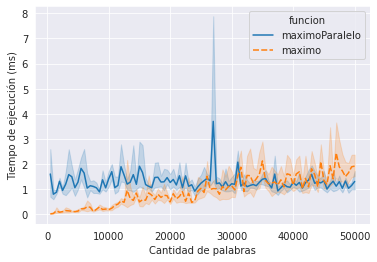

In [6]:
# Instancias UNIFORMES
data = maximo_comparacion.copy()
data = data[data["dataset"] == "uniforme"]

g = sns.lineplot(data=data, x='palabras', y='tiempo', hue='funcion', style="funcion", markers=False, err_style="band")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Tiempo de ejecución (ms)")
plt.savefig('results/maximo-single-vs-paralelo/max-experimento2-a.svg')
plt.show()

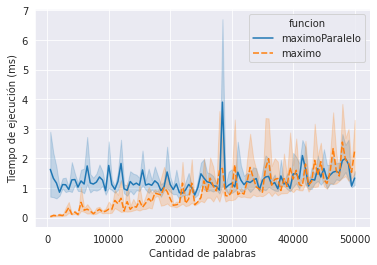

In [7]:
# Instancias NORMALES
data = maximo_comparacion.copy()
data = data[data["dataset"] == "normal"]

g = sns.lineplot(data=data, x='palabras', y='tiempo', hue='funcion', style="funcion", markers=False, err_style="band")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Tiempo de ejecución (ms)")
plt.savefig('results/maximo-single-vs-paralelo/max-experimento2-b.svg')
plt.show()